In [0]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import scipy.stats
from collections import Counter 
from copy import *



def chi_square(repetitions, null_activate, statistics, daughter_particles, assume_origin, dx, dy, daughter_ignore): #change code if you wanna change dz too
  chi=[] #define list for chi-square
  #in case you are tracking 3/4 daughter particles
  chi2=[]
  chi3=[]
  chi4=[]
  #specify parameters
  aa=-1000 #lower edge of detector
  bb=1000 #upper edge of detector
  cc=0.1 #width of the detection cell
  #dx=0 #small displacement of the fourth particle in x direction
  #dy=0 #small displacement of the fourth particle in y direction
  #make lists of intersection points:
  prediction_a=[]
  prediction_b=[]
  y12=[]
  y13=[]
  y14=[]
  y23=[]
  y24=[]
  y34=[]
  x12=[]
  x13=[]
  x14=[]
  x23=[]
  x24=[]
  x34=[]
  centroid_x=[]
  centroid_y=[]
  coordinates_centroid=[]
  #null_activate: if you want to exclude every 1% of the measurements from chi2 calculation, choose False, else True
  #daugher_particles: 1/3/4 daughter particles that you do the exercise with
  #assume_origin: True if manually set b=0, False if let computer calculate b
  #daughter_ignore: True if you want to ignore one of the daughters in the calculation of chi2, else False


  print("Simulation run for: ", daughter_particles, " particle(s) for: ", repetitions, " repetition(s).")

  #define detection cells of the detector
  detectorX=np.arange(aa,bb,cc) #list for x axis of detector
  detectorY=np.arange(aa,bb,cc) #list for y axis of detector

  for p in range(daughter_particles):
    for k in range(repetitions): #for every particle we track (one at the time):
      # Data for a three-dimensional line (3D location of a particle)
      if p==0 or p==1 or p==2:
        zline = np.linspace(0, 10, 80) #create z axis
        xline=zline*np.tan(random.randint(0,90)) #for every z, there exist such x, y based on a random initial angle
        yline=zline*np.tan(random.randint(0,90))
      if p==3:
        zline = np.linspace(0, 10, 80) #create z axis
        xline=dx+zline*np.tan(random.randint(0,90)) #for every z, there exist such x, y based on a random initial angle
        yline=dy+zline*np.tan(random.randint(0,90))

      #get 3D location of a particle for only 8 detection points
      number=int(len(zline)/8.5) #to get 8 detection points, excludig 0 start (which we will later substract)
      XdetPoints=xline[::number]
      YdetPoints=yline[::number]
      ZdetPoints=zline[::number]

      #make arrays into lists so you can use list tools (like .pop()/.remove()...)
      ZdetPoints=list(ZdetPoints)
      YdetPoints=list(YdetPoints)
      XdetPoints=list(XdetPoints)

      XdetPoints.remove(XdetPoints[0])
      YdetPoints.pop(0)
      ZdetPoints.pop(0)

      if repetitions==1:
        print("")
        print("Actual points where the particle ended:")
        print("z points",ZdetPoints)
        print("y points:",YdetPoints)
        print("x points:",XdetPoints)
      if repetitions!=1:
        pass

      #detected points lists (error of non-infinetelisimal detection cells)
      x_cell_size_error_incl=[]
      y_cell_size_error_incl=[]


      """which cells detect the particle:"""
      m=0
      for m in range(len(XdetPoints)): #for every element in x values for detected particles
        j=0
        for j in range(len(detectorX)): #for every possible detection cell
          if j<(len(detectorX)-1): #except for the last detection cell (out of range error)
            if detectorX[j]<=XdetPoints[m]<detectorX[j+1]: #if the value of the detected points is between the value of jth and j+1th element of detection cell
              x_cell_size_error_incl.append((detectorX[j]+detectorX[j+1])/2) #set this detector cell as the cell that detected the particle
      else:
        pass

      m=0
      for m in range(len(YdetPoints)): #for every element in y values for detected particles
        j=0
        for j in range(len(detectorY)): #for every point in the detection cells
          if j<(len(detectorY)-1): #except for the last detection cell
            if detectorY[j]<=YdetPoints[m]<detectorY[j+1]: #if the value of the detected points is between the value of jth and j+1th element of detection cells
              y_cell_size_error_incl.append((detectorY[j]+detectorY[j+1])/2)
      else:
        pass

      if repetitions==1:
        print("")
        print("Detector cells that would ideally detect the particles, given the non-infinetelisimal nature of detector cells:")
        print("x cells: ", x_cell_size_error_incl)
        print("y cells: ", y_cell_size_error_incl)
      if repetitions!=1:
        pass

      """
      add a small probability (10% maybe) that it is found in an
      adjacent pixel (there are 8 adjacent pixels) – pick one randomly. Record that as the
      coordinate and then move to the next detector layer.
      """

      #only consider cases where a particle lands on every detector (if it happens for instance to have the initial angle of 89 degrees or so wrt z axis, then it will not hit the detector)
      if len(y_cell_size_error_incl)==len(x_cell_size_error_incl)==8: 

        #each elemenet of detected x,y values gets a random number 0-1
        probX=[]
        for m in x_cell_size_error_incl:
          probX.append(random.random())
        #print(probX) 
        probY=[]
        for m in y_cell_size_error_incl:
          probY.append(random.random())
        #print(probY) 

        #lists of final detected locations of each particle (incl prob that it is found in an adjacent pixel)
        x_measured=[]
        y_measured=[]

        #probability that it is detected in the detected pixel, prob that it is detected in any 8 of the adjacent pixels...
        i=0
        for i in range(len(probX)):
          if 0<=probX[i]<0.0375:
            x_measured.append(x_cell_size_error_incl[i]-cc)
          if 0.0375<=probX[i]<0.075:
            x_measured.append(x_cell_size_error_incl[i]+cc)
          if 0.075<=probX[i]:
            x_measured.append(x_cell_size_error_incl[i])

        i=0
        for i in range(len(probY)):
          if 0<=probY[i]<0.0375:
            y_measured.append(y_cell_size_error_incl[i]-0.25)
          if 0.0375<=probY[i]<0.075:
            y_measured.append(y_cell_size_error_incl[i]+0.25)
          if 0.075<=probY[i]:
            y_measured.append(y_cell_size_error_incl[i])
        

        

        if repetitions==1:
          print("")
          print("measured x (probs incl): ", x_measured)
          print("measured y (probs incl): ", y_measured)
        if repetitions!=1:
          pass

        """
        Use the information from the slides linked to calculate the 𝜒
        2 value for your track fit
        compared to your data. We expect this to not be perfect – we added some
        imperfection in there. If the imperfection is not good enough, you can increase the
        probabilities discussed.
        """
        sigma=[cc**2]*len(y_measured)
        #print("sigma list: ", sigma)


        Alist=[]
        Blist=[]
        Clist=[]
        Dlist=[]
        Elist=[]
        Flist=[]

        for i in range(len(sigma)):
          Alist.append(y_measured[i]/sigma[i])
          Blist.append(1/sigma[i])
          Clist.append(x_measured[i]/sigma[i])
          Dlist.append((y_measured[i]**2)/sigma[i])
          Elist.append((x_measured[i]*y_measured[i])/sigma[i])
          Flist.append((x_measured[i]**2)/sigma[i])
        A=sum(Alist)
        B=sum(Blist)
        C=sum(Clist)
        D=sum(Dlist)
        E=sum(Elist)
        F=sum(Flist)
        #print(A, B, C, D, E, F)

        a=(E*B-C*A)/(D*B-A*A)
        if assume_origin==False:
          b=(D*C-E*A)/(B*D-A*A)
        if assume_origin==True:
          b=0
        #add to lists a,b
        prediction_a.append(a)
        prediction_b.append(b)

        if repetitions==1:
          print("")
          print("Prediction: x=", round(a,4),"*y + ", round(b,4))
          print("")
        if repetitions!=1:
          pass

        #predicted x values based on the formula deduced from datapoints
        linear_fit=[]

        for i in range(len(y_measured)):
          #print(y_measured[i])
          linear_fit.append(a*y_measured[i]+b)
        #print(linear_fit)

        #finally find chi
        ChiList=[]
        for i in range(len(sigma)):
          h=(x_measured[i]-a*y_measured[i]-b)**2/sigma[i]
          ChiList.append(h)

        if p==0:
          chi.append(sum(ChiList))
        if daughter_particles==3 or daughter_particles==4:
          if p==1:
            chi2.append(sum(ChiList))
          if p==2:
            chi3.append(sum(ChiList))
        if daughter_particles==4:
          if p==3:
            chi4.append(sum(ChiList))

      #escaped particles have "False" on their repetition spot in prediction_a/b lists
      if len(y_cell_size_error_incl)!=8 or len(x_cell_size_error_incl)!=8:
        prediction_a.append("False")
        prediction_b.append("False")



    #you've gathered all repetitions for a certain daughter particle
    chi = [x for x in chi if str(x) != 'nan'] #remove infinities
    if daughter_particles==3 or daughter_particles==4:
       chi2 = [x for x in chi2 if str(x) != 'nan']
       chi3 = [x for x in chi3 if str(x) != 'nan']
    if daughter_particles==4:
       chi4 = [x for x in chi4 if str(x) != 'nan']
    
    
    
    #you are at a point: all repetitions for one daughter







  print("lenChi2: ", len(chi), len(chi2), len(chi3), len(chi4))

  #you've gathered info for all daughters and all repetitions

  #your lists, after you've done all repetitions for all daughters, look like:
  #prediction_a=[a_D1(rep=1), a_D1(rep=2),..., a_D1(rep=rep), a_D2(rep=1),..., a_D2(rep=rep), ... ... , a_Ddaughter_particles(rep=1), ..., a_Ddaughter_particles(rep=rep)]
  #same for prediction_b
  #NO!!!!
  #it is not the amount of repetitions that determines how many times each daughter will appear in the list. It is that, minus the amount of times that the particles misses the detector!!
  #
  #
  #
  # CREATE A LIST FOR CASES WHEN A PARTICLE DOES NOT HIT A DETECTOR. IF IN SOME REPETITION, A PARTICLE MISSES THE DETECTOR, APPEND 1 TO THAT "MISSED LIST". CREATE A MISSED LIST FOR EACH DAUGHTER. 
  # IF A PARTICLE IS DETECTED, APPEND 0

  #AT THE END, CHECK AT WHICH LOCATIONS DOES 0 APPEAR IN YOUR MISSED LISTS
  #FOR EXAMPLE:
    #MISSED1: LOC2,4,5
    #MISSED2: LOC6
    #MISSED3: 0
    #MISSED4: LOC8, LOC9

    #ASIDE FROM MAKING THE MISSED LIST, THERE ALSO APPEND "FALSE" OF STH TO prediction_a/b list, IF PARTICLE ESCAPES, SO THAT ALL PREDICTION_A/B HAVE THE FORM AS ABOVE, JUST WITH "FALSE" AT LOC IDENTIFIED
    #FIND LOCATIONS OF FALSES (NO NEED FOR MISSED LIST THEN!!!)
    #REMOVE SUCH LOCATIONS FROM EVERY PREDICTION_A/B LIST
    #LEN OF TOTAL THINGS REMOVED (LEN(PREDICTION_A)) IS NOW YOUR RANGE


  #CHANGE RANGE(REPETITIONS) TO RANGE(REPETITONS-SUM(MISSED_LIST1/2/3/4)), DEPENDING ON WHICH DAUGHTER YOU CALCULATE ATM
  #MAKE UR LIFE A BIT MORE BEARABLE:
    #CALCULATE WHICH SUM(MISSED_LISTN) IS THE BIGGEST (=THE LEAST REPETITIONS COLLECTED)
    #   SINCE PARTICLES DO NOT FEEL EACH OTHER ANYWAY, 1 EVENT COMPOSED OF REPETITON 1 OF ALL DAUGHTERS MIGHT AS WELL BE REPLACED WITH 1 EVENT COMPOSED OF D1 REP1, D2 REP3, D4 REP16...
    #


  print("")
  print("prediction a: ",prediction_a)
  print("prediction b: ",prediction_b)
  print("len(pred_a)",len(prediction_a))
  print("")

  #find which repetitons are missed:

  #repetitions=2
  #prediction_a = ['Hello', 'False', 'is', 'Ok', 'test', 'this', 'Yes', 'False']
  #prediction_b = ['Hello', 'False', 'is', 'Ok', 'test', 'this', 'No', 'False']
  #daughter_particles=4
  
  # Use List Comprehension Get indexes of all occurrences of 'Ok' in the list
  g=int(len(prediction_a)/daughter_particles)
  #missed locations for each daughter
  missed_loc1 = [ i for i in range(g) if prediction_a[i] == 'False' ]
  if daughter_particles>=2:
    missed_loc2 = [ i-g for i in range(g, 2*g) if prediction_a[i] == 'False' ]
    if daughter_particles>=3:    
        missed_loc3 = [ i-2*g for i in range(2*g, 3*g) if prediction_a[i] == 'False' ]
        if daughter_particles==4:
          missed_loc4 = [ i-3*g for i in range(3*g, 4*g) if prediction_a[i] == 'False' ]

  missed_loc=missed_loc1+missed_loc2+missed_loc3+missed_loc4
  missed_loc.sort(reverse = True)
  missed_loc = list(dict.fromkeys(missed_loc))

  #print(missed_loc)

  #now remove these repetitions from prediction_a, prediction_b:
  new_prediction_a=deepcopy(prediction_a, memo=None, _nil=[])
  new_prediction_b=deepcopy(prediction_b, memo=None, _nil=[])
  #print(new_prediction_a)
  #print(new_prediction_b)
  for i in missed_loc:
    new_prediction_a.remove(prediction_a[(3*g)+i])
    new_prediction_b.remove(prediction_b[(3*g)+i])
    new_prediction_a.remove(prediction_a[(2*g)+i])
    new_prediction_b.remove(prediction_b[(2*g)+i])
    new_prediction_a.remove(prediction_a[(g)+i])
    new_prediction_b.remove(prediction_b[(g)+i])
    new_prediction_a.remove(prediction_a[i])
    new_prediction_b.remove(prediction_b[i])

  prediction_a=new_prediction_a
  prediction_b=new_prediction_b

  #print(prediction_a)
  #print(prediction_b)

  repetitions=repetitions-len(missed_loc)
  print("repetitions:",repetitions)

  print("")
  print("prediction a after: ",prediction_a)
  print("prediction b after: ",prediction_b)
  print("len(pred_a)-should be the same as repetitions above",len(prediction_a))
  print("")






  #find cross points
  #you need to do it once you already have equations for all the particle trajectories (after repetitions and daughters loop)

  for i in range(repetitions):
    if daughter_particles>=2:
      y12.append((prediction_b[(repetitions-1)+i]-prediction_b[i])/(prediction_a[i]-prediction_a[(repetitions-1)+i])) #for each repetition, (second daughter's b-first daughter's b)/(first daughter's a - second daughter's a)
      if daughter_particles>=3:
        y13.append((prediction_b[(repetitions*2-1)+i]-prediction_b[i])/(prediction_a[i]-prediction_a[(repetitions*2-1)+i]))
        y23.append((prediction_b[repetitions*2-1+i]-prediction_b[repetitions-1+i])/(prediction_a[repetitions-1+i]-prediction_a[repetitions*2-1+i]))
        if daughter_particles==4:
          y14.append((prediction_b[3*repetitions-1+i]-prediction_b[i])/(prediction_a[i]-prediction_a[repetitions*3-1+i]))
          y24.append((prediction_b[3*repetitions-1+i]-prediction_b[repetitions-1+i])/(prediction_a[repetitions-1+i]-prediction_a[3*repetitions-1+i]))
          y34.append((prediction_b[3*repetitions-1+i]-prediction_b[2*repetitions-1+i])/(prediction_a[2*repetitions-1+i]-prediction_a[3*repetitions-1+i]))

        #what do I end up with:
        #y12=[rep1, rep2,rep3,...rep=rep]     this makes sense because we are calculating intersection points for each repetition, so we get 1 y12 value per repetition
        #D>=2: len(y12)=repetitions else 0
        #D>=3: len(13=23)=repetitions else 0
        #D==4: len(14=24=34)=repetitons else 0

        #below, the same wil be done for xNM

        """
        YOU HAVE CHECKED IT UP TILL HERE
        """


    #find x values correcponding to these y values 
    #again, for every repetition
  for i in range(repetitions):
    if daughter_particles>=2:
      x12.append(prediction_a[i]*y12[i] + prediction_b[i])
      if daughter_particles>=3:
        x13.append(prediction_a[i]*y13[i] + prediction_b[i])
        x23.append(prediction_a[repetitions-1+i]*y23[i] + prediction_b[repetitions-1+i])
        if daughter_particles==4:
          x14.append(prediction_a[i]*y14[i] + prediction_b[i])
          x24.append(prediction_a[repetitions-1+i]*y24[i] + prediction_b[repetitions-1+i])
          x34.append(prediction_a[2*repetitions-1+i]*y34[i] + prediction_b[2*repetitions-1+i])

    #y12=[rep1, rep2,rep3,...rep=rep]
    #find centroid of these points
  for i in range(repetitions):
    if daughter_particles==2:
      centroid_x.append(x12[i])
      centroid_y.append(y12[i])

    if daughter_particles==3:
      centroid_x.append((x12[i]+x13[i]+x23[i])/3)
      centroid_y.append((y12[i]+y13[i]+y23[i])/3)

    if daughter_particles==4:
      centroid_x.append((x12[i]+x13[i]+x14[i]+x23[i]+x24[i]+x34[i])/6)
      centroid_y.append((y12[i]+y13[i]+y14[i]+y23[i]+y24[i]+y34[i])/6)


  print("centroid x: ", centroid_x)
  print("centroid y:", centroid_y)

  #range(repetitions)?
  for i in range(len(centroid_x)):
    coordinates_centroid.append([centroid_x[i], centroid_y[i]])

  if 2<=daughter_particles<=4:
    print("The points of the closest approach are (y,x): (",coordinates_centroid,")." )
    plt.scatter(centroid_y,centroid_x)
    plt.title("The Points Of The Closest Approach")
    plt.show()
  if daughter_particles==1 or daughter_particles>4:
    pass


  #plotting graphs
  if repetitions==1:
    plt.plot(y_measured, linear_fit, "blue", label="prediction") #make graph
    plt.plot(y_measured, x_measured, "red", label="detection")#make graph of actual particle
    plt.legend(loc="lower right")
    plt.title("Detection vs Prediction")
    plt.show()
  if repetitions!=1:
    plt.hist(chi, color="blue", label="daughter 1")
    if daughter_particles==3 or daughter_particles==4:
      plt.hist(chi2, color="green", label="daughter 2")
      plt.hist(chi3, color="purple", label="daughter 3")
    if daughter_particles==4:
      plt.hist(chi, color="gold", label="daughter 4")
    plt.title("full histogram")
    plt.legend(loc="upper right")
    plt.show()

  #leave out 1 percent
  if daughter_particles==1:
    if null_activate==True:
      probsnull=[]
      for i in range(len(ChiList)):
        probsnull.append(random.random())
      for i in range(len(probsnull)):
        if probsnull[i]<0.01:
          chi.remove(chi[i])

  #if len(y_cell_size_error_incl)!=len(x_cell_size_error_incl)!=8:
  #  pass

  print("Chi-square, daughter 1:", chi)
  if daughter_particles==3 or daughter_particles==4:
    print("Chi-square, daughter 2: ", chi2)
    print("Chi-square, daughter 3: ", chi3)
  if daughter_particles==4:
    print("Chi-square, daughter 4: ", chi4)

  if statistics==True:
    print("")
    print("Statistics for Daughter 1")
    print("mean: {}" .format(np.mean(chi)))
    print("variance: {}" .format(np.var(chi)))
    print("skewness: {}" .format(skew(chi)))
    print("kurtosis: {}" .format(kurtosis(chi)))
    if daughter_particles==3 or daughter_particles==4:
      print("")
      print("Statistics for Daughter 2")
      print("mean: {}" .format(np.mean(chi2)))
      print("variance: {}" .format(np.var(chi2)))
      print("skewness: {}" .format(skew(chi2)))
      print("kurtosis: {}" .format(kurtosis(chi2)))
      print("")
      print("Statistics for Daughter 3")
      print("mean: {}" .format(np.mean(chi3)))
      print("variance: {}" .format(np.var(chi3)))
      print("skewness: {}" .format(skew(chi3)))
      print("kurtosis: {}" .format(kurtosis(chi3)))
    if daughter_particles==4:
      print("")
      print("Statistics for Daughter 4")
      print("mean: {}" .format(np.mean(chi4)))
      print("variance: {}" .format(np.var(chi4)))
      print("skewness: {}" .format(skew(chi4)))
      print("kurtosis: {}" .format(kurtosis(chi4)))

Simulation run for:  4  particle(s) for:  100  repetition(s).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:209: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:211: RuntimeWarning: invalid value encountered in double_scalars


lenChi2:  96 99 97 97

prediction a:  [18.452830188687212, -0.1011508236286762, -3.354779546621672, -0.054487179487179446, -1.4390463337831778, 'False', 0.945568028890055, 0.9487109422024408, -0.07904663491023388, 3.1030782585821317, -0.3392181856809006, 5.661475964793435, -3.208801593905439e-17, 0.968390804597701, -0.037269683654088406, -2059.000000000003, -8.523809523809513, 'False', -45.29349943374918, 13.356699470098409, -6.459679191386512, -0.8222711441151347, 0.4200725345236428, 2.337973600036046, 2.2123015873015905, 0.9314478501184416, -0.3875105130361668, 353.0285714286519, 2.4962153069806536, 2.839285714285718, 0.017989559630571587, 0.4958748127184962, 1.4423868312757222, -4.1193890667137065, -0.0735588972431079, -0.053588026024806855, -1.2995862425652964, 5.461671004875902, -0.3928571428571442, 121.33913043481026, 0.4394211640890718, -2.4408611088022782, -2376.179487179489, 0.9337218659318707, -0.1596098028067853, 0.12961877728977841, -1.2000000000002728, 0.6479380016606695, 

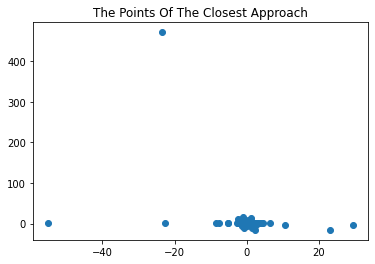

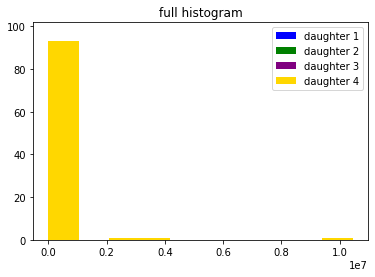

Chi-square, daughter 1: [6166.981132077471, 1.1418760485447526, 10.143056268799235, 0.5833333333335983, 1.7453891138109627, 4.856458684965361, 4.959700120492558, 1.9062765162017925, 51.41076732869316, 0.8008073082646558, 99.63168584969063, 5.296307347064897e-31, 1.3534482758626876, 0.5142566578211867, 2649161.500001204, 2.285714285714546, 14442.677146094311, 102.85601816810097, 25.793891452439016, 6.661546296906916, 1.4031245640957393, 27.17394242465159, 0.5357142857143409, 10.724283971000773, 0.784062237174161, 10446557.714290462, 6.465937762828085, 0.5357142857145307, 0.48887699103220744, 1.53732645247254, 1.6486625514407598, 11.795246616431992, 0.8690476190475345, 0.0015384122303778451, 1.5923519524182483, 220.42284708731, 0.8214285714285702, 177423.65217399294, 1.7543156003338092, 26.9272712160243, 3396096.7179502626, 1.2120632056384764, 1.080163978575389, 0.6273823646976534, 132.00000000006003, 0.06642679213952656, 1126.7049891545298, 1.1120502188597539, 2.154577191621837, 0.47619

In [12]:
chi_square(100,False, False, 4, False, 2,3, False)

Simulation run for:  4  particle(s) for:  10  repetition(s).
The points of the closest approach are (y,x): ( [[-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867], [-23.169834544600594, -0.24059694942830867]] ).


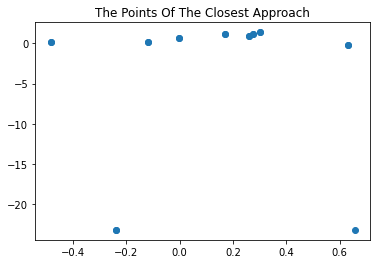

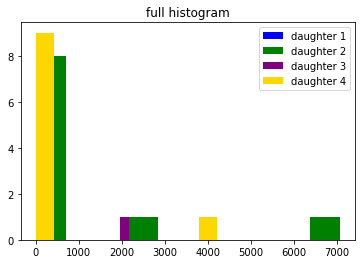

Chi-square, daughter 1: [7.24022346369043, 14.419354369004601, 1.171028733846084, 0.6429706794685461, 0.9392627412176464, 4204.074585635661, 0.5843464952233502, 1.8092591262132953, 9.992156862749649, 0.00883790099851674]
Chi-square, daughter 2:  [2.2273987553436694, 3.080327868852995, 0.5103359326475485, 7068.435275590263, 0.47619047619069393, 1.333333333333567, 0.9271019695504553, 0.5692258427303589, 2.2857142857149118, 2139.3333333343057]
Chi-square, daughter 3:  [202.77118371030744, 6.162975822039154e-31, 2164.2525406504856, 0.6362226173810989, 4.098593912549043, 1.8200778310026207, 0.6785326676799266, 0.6534750860734682, 140.79563182532843, 0.6118771588796494]
Chi-square, daughter 4:  [0.4577477641907576, 0.47619047619069393, 0.8571428571428573, 69.10719564632839, 11.774387623554972, 1.0841167738743918, 701.2184043458593, 2.8685039763920916, 164.72775214246656]

Statistics for Daughter 1
mean: 424.0882026008074
variance: 1587610.1549442417
skewness: 2.6665987176098542
kurtosis: 5.1

In [0]:
chi_square(10, False, True, 4, False, 0, 0, 0)

In [0]:
dz=0
dx=1
dy=2
zline = np.linspace(dz, dz+10, 80) #create z axis
xline=dx+zline*np.tan(random.randint(0,90)) #for every z, there exist such x, y based on a random initial angle
yline=dy+zline*np.tan(random.randint(0,90))
print("zline: ", zline)
print("xline: ", xline)
print("yline: ", yline)

print(zline[0])
print(zline[9])
print(zline[19])
print(zline[69])
print(zline[79])
#print(yline[0])

zline:  [ 0.          0.12658228  0.25316456  0.37974684  0.50632911  0.63291139
  0.75949367  0.88607595  1.01265823  1.13924051  1.26582278  1.39240506
  1.51898734  1.64556962  1.7721519   1.89873418  2.02531646  2.15189873
  2.27848101  2.40506329  2.53164557  2.65822785  2.78481013  2.91139241
  3.03797468  3.16455696  3.29113924  3.41772152  3.5443038   3.67088608
  3.79746835  3.92405063  4.05063291  4.17721519  4.30379747  4.43037975
  4.55696203  4.6835443   4.81012658  4.93670886  5.06329114  5.18987342
  5.3164557   5.44303797  5.56962025  5.69620253  5.82278481  5.94936709
  6.07594937  6.20253165  6.32911392  6.4556962   6.58227848  6.70886076
  6.83544304  6.96202532  7.08860759  7.21518987  7.34177215  7.46835443
  7.59493671  7.72151899  7.84810127  7.97468354  8.10126582  8.2278481
  8.35443038  8.48101266  8.60759494  8.73417722  8.86075949  8.98734177
  9.11392405  9.24050633  9.36708861  9.49367089  9.62025316  9.74683544
  9.87341772 10.        ]
xline:  [  1.     

In [0]:
repetitions=2
daughters=3
prediction_b=list(range(0, daughters*repetitions))
prediction_a=list(range(0, daughters*repetitions))
print(len(prediction_a), len(prediction_b))
for i in range(repetitions):  
  print("i: ", i)
  y13.append((prediction_b[repetitions*2+i]-prediction_b[i])/(prediction_a[i]-prediction_a[repetitions*2+i]))

print(y13)
print(repetitions*2-1)

6 6
i:  0
i:  1
[0.04141523011244075, -0.06807677367070011, -0.011170898741240347, -0.1720454730180716, 0.04141523011244075, -0.06807677367070011, -0.011170898741240347, -0.1720454730180716, 0.04141523011244075, -0.06807677367070011, -0.011170898741240347, -0.1720454730180716, 0.04141523011244075, -0.06807677367070011, -0.011170898741240347, -0.1720454730180716, 0.15225874074622847, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
3


In [0]:

# List of strings
prediction_a = ['Hello', 'False', 'is', 'Ok', 'test', 'this', 'is', 'a', 'test', 'Ok']
daughter_particles=2
 
# Use List Comprehension Get indexes of all occurrences of 'Ok' in the list
missed_loc1 = [ i for i in range(round((len(prediction_a)/daughter_particles,0))) if prediction_a[i] == 'False' ]


 
print(missed_loc1)


TypeError: ignored

In [0]:
#2 repetitions
from collections import Counter 
# List of strings
prediction_a = ['Hello', 'False', 'is', 'Ok', 'test', 'this', 'False', 'False']
daughter_particles=4
 
# Use List Comprehension Get indexes of all occurrences of 'Ok' in the list
g=int(len(prediction_a)/daughter_particles)
#missed locations for each daughter
missed_loc1 = [ i for i in range(g) if prediction_a[i] == 'False' ]
if daughter_particles>=2:
  missed_loc2 = [ i-g for i in range(g, 2*g) if prediction_a[i] == 'False' ]
  if daughter_particles>=3:    
      missed_loc3 = [ i-2*g for i in range(2*g, 3*g) if prediction_a[i] == 'False' ]
      if daughter_particles==4:
        missed_loc4 = [ i-3*g for i in range(3*g, 4*g) if prediction_a[i] == 'False' ]


missed_loc=missed_loc1+missed_loc2+missed_loc3+missed_loc4
missed_loc.sort(reverse = True)

mylist = ["a", "b", "a", "c", "c"]
missed_loc = list(dict.fromkeys(missed_loc))




 
print(missed_loc1)
print(missed_loc2)
print(missed_loc3)
print(missed_loc4)
print(missed_loc)
print(missed_repetition)

In [0]:
#find which repetitons are missed:
from copy import *

repetitions=2
#prediction_a = ['Hello', 'False', 'is', 'Ok', 'test', 'this', 'Yes', 'False']
#prediction_b = ['Hello', 'False', 'is', 'Ok', 'test', 'this', 'No', 'False']
daughter_particles=4
 
# Use List Comprehension Get indexes of all occurrences of 'Ok' in the list
g=int(len(prediction_a)/daughter_particles)
#missed locations for each daughter
missed_loc1 = [ i for i in range(g) if prediction_a[i] == 'False' ]
if daughter_particles>=2:
  missed_loc2 = [ i-g for i in range(g, 2*g) if prediction_a[i] == 'False' ]
  if daughter_particles>=3:    
      missed_loc3 = [ i-2*g for i in range(2*g, 3*g) if prediction_a[i] == 'False' ]
      if daughter_particles==4:
        missed_loc4 = [ i-3*g for i in range(3*g, 4*g) if prediction_a[i] == 'False' ]

missed_loc=missed_loc1+missed_loc2+missed_loc3+missed_loc4
missed_loc.sort(reverse = True)
missed_loc = list(dict.fromkeys(missed_loc))

#print(missed_loc)

#now remove these repetitions from prediction_a, prediction_b:
new_prediction_a=deepcopy(prediction_a, memo=None, _nil=[])
new_prediction_b=deepcopy(prediction_b, memo=None, _nil=[])
print(new_prediction_a)
print(new_prediction_b)
for i in missed_loc:
  new_prediction_a.remove(prediction_a[(3*g)+i])
  new_prediction_b.remove(prediction_b[(3*g)+i])
  new_prediction_a.remove(prediction_a[(2*g)+i])
  new_prediction_b.remove(prediction_b[(2*g)+i])
  new_prediction_a.remove(prediction_a[(g)+i])
  new_prediction_b.remove(prediction_b[(g)+i])
  new_prediction_a.remove(prediction_a[i])
  new_prediction_b.remove(prediction_b[i])

prediction_a=new_prediction_a
prediction_b=new_prediction_b

#print(prediction_a)
#print(prediction_b)

repetitions=repetitions-len(missed_loc)
#print(repetitions)


['Hello', 'False', 'is', 'Ok', 'test', 'this', 'Yes', 'False']
['Hello', 'False', 'is', 'Ok', 'test', 'this', 'No', 'False']
